# KNN For heart Disease prediction

###  Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load the Dataset

In [ ]:

# Assuming your dataset is stored in a CSV file named 'heart.csv'
df = pd.read_csv('heart.csv')
# Display the first few rows of the dataset
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   70    1   3       130   322    0        2      109      0      2.4      1   
1   67    0   2       115   564    0        2      160      0      1.6      1   
2   57    1   1       124   261    0        0      141      0      0.3      0   
3   64    1   3       128   263    0        0      105      1      0.2      1   
4   74    0   1       120   269    0        2      121      1      0.2      0   

   ca  thal  target  
0   3     1       1  
1   0     3       0  
2   0     3       1  
3   1     3       0  
4   1     1       0  


###  Data Preprocessing

In [ ]:

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



###  Trouver la meilleure valeur de k

In [ ]:
k_values = list(range(1, 21))
#IMPORTANT
# Initialiser une liste pour stocker les scores de validation croisée
cross_val_scores = []
# Effectuer la validation croisée pour chaque valeur de k
for k in k_values:
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn_classifier, X_train, y_train, cv=5) # 5-fold cross-validation
  cross_val_scores.append(np.mean(scores))
# Trouver la meilleure valeur de k
best_k = k_values[np.argmax(cross_val_scores)]
print("Meilleure valeur de k :", best_k)

Meilleure valeur de k : 5


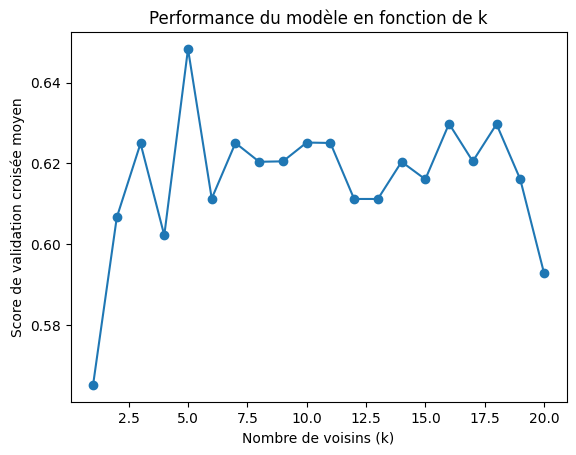

In [ ]:
# Tracer les performances en fonction de k
plt.plot(k_values, cross_val_scores, marker='o')
plt.title('Performance du modèle en fonction de k')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score de validation croisée moyen')
plt.show()

### Data Visualization

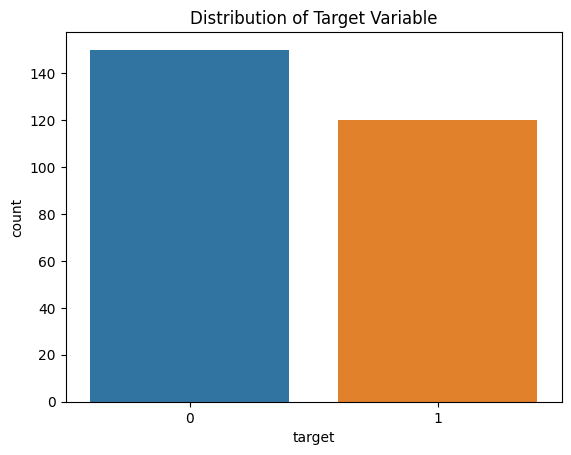

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

### Train the KNN Classifier

In [ ]:
# Choose the value of k (number of neighbors)
k_value = 3
# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Make Predictions

In [ ]:
# Predict on the test set
y_pred = knn_classifier.predict(X_test_scaled)

### Evaluate the Model

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Display classification report print("Classification Report:")
print(classification_report(y_test, y_pred))
# Display confusion matrix print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        33
           1       0.88      0.67      0.76        21

    accuracy                           0.83        54
   macro avg       0.85      0.80      0.81        54
weighted avg       0.84      0.83      0.83        54

[[31  2]
 [ 7 14]]


###  Confusion Matrix Plot

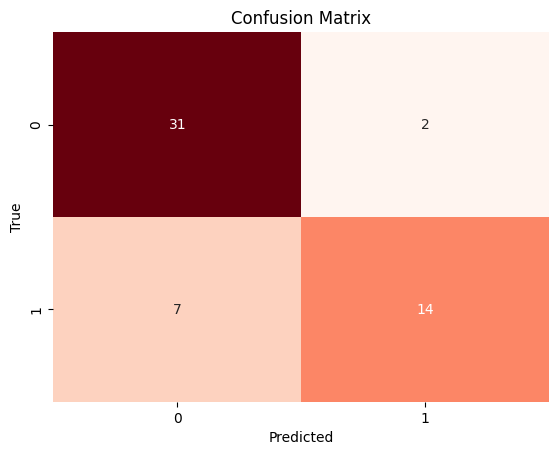

In [ ]:
# prompt: afficher la matrice de confusion avec une couleur rouge

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds',
cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Optimize the Model

You can experiment with different values of k and other parameters to optimize the model.
For example:

In [ ]:
# Try different values of k
for k_value in range(1, 10):
  knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
  knn_classifier.fit(X_train_scaled, y_train)
  y_pred = knn_classifier.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy for k={k_value}: {accuracy:.2f}")

Accuracy for k=1: 0.81
Accuracy for k=2: 0.80
Accuracy for k=3: 0.83
Accuracy for k=4: 0.81
Accuracy for k=5: 0.80
Accuracy for k=6: 0.81
Accuracy for k=7: 0.87
Accuracy for k=8: 0.85
Accuracy for k=9: 0.83


In [ ]:
# prompt: code pour optimiser le model  k allant de 1 a 10

# Optimize the model
best_accuracy = 0
best_k = 0
for k in range(1, 11):
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(X_train_scaled, y_train)
  accuracy = accuracy_score(y_test, knn_classifier.predict(X_test_scaled))
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_k = k
print(f"Best accuracy: {best_accuracy:.2f} with k={best_k}")

Best accuracy: 0.87 with k=7
